<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU_10_1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 단순 회귀 분석

   지도 학습은  "정답" 이 있는 주어진 상태에서 학습하는 방법

2. 회귀
   특정 변수가 다른 변수에 어떤 영향을 미치는지를 수학적 표현으로 설명, 예측하는 기법
   독립 변수로 종속 변수를 예측

   독립 변수의 개수가 1개 이면 단일 복수개이면 다중,
   종속 변수가 선형이면 선형, 비선형이면 비선형

   . 선형/비선형 회귀

     로지스틱 회귀

     의사 결정 나무 (회귀)

     

. 단순 선형 회귀 분석은 가장 단순한 분석으로 한 개의 종속 변수와 한개의 독립변수 로 구성됨.

  y = ax + b

   (a : 회귀 계수,  b: 절편 )

1. 단순 선형 회귀 알고리즘

   . 실제값과 회귀 모델에 의해 예측된 값과 차이를 잔차 또는 오류 라고 한다. 잔차의 합이 최소가 되는 최적의 회귀 계수를 찾아내는 것이 회귀 모델의 목표.

   . 잔차는 +, - 가 될 수 있기 때문에, 잔차의 제곱의 합 (RSS)를 최소ㅗ로 하는 최소제곱법 (최소 자승법)을 이용하여 잔차의 합이 최소가 되는 모델을 만듬.  ( 최소 제곱법 : MLS )
   ( Method of Least Squares , 잔차 제곱의 합이 최소가 되게 하는 직선을 찾는 방법) **굵은 텍스트**

**굵은 텍스트**
    .

자동차 연비 데이터셋 사용해서  자동차 연비를 예측하는 선형 회귀 모델을 구성해 보자  ( mpg :  갤런당 마일 , mile per gallen)

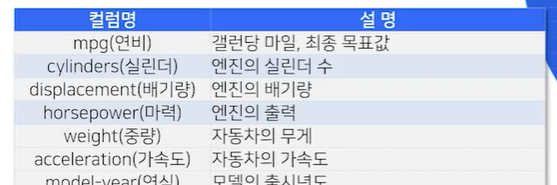

[ 접근 방법 ]

 . 종속 변수는 mpg로 하자.
 . mpg 에 대해 나머지 변수들의 상관성을  산점도 이용하여 분석.
 . 상관성이 있다고 판단되는 변수를 선택한 후 각각에 대해 선형회귀 알고리즘을 적용하여 모델을 생성
  **. 결정 계수 값을 **구해서 모델의 성능을 평가하고,

  학습 데이터 셋과 테스트 데이터 셋에 대해 모두 평가 해 보자.


 1. 종속 변수를 정의 하는 것. ( mpg , 연비를 계산 하는 것 )

    (ex: titanic :  생존 여부를 계산 하는 것.  surviced )

    (ex: boston housing price :  집값을 예측 하는 것 .   ... )
    
    (ex: breast canser 예측 :  암 여부를 판단 하는 것.  .. ) determine


1. 필요 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 선형 회귀 모델을 위한 패키지
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


## 학습 및 테스트 데이타 셋 분리를 위한 패키지
from sklearn.model_selection import train_test_split

## 성적 메기기.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error   ## MSE




2. 데이터 불러오기

In [ ]:
##  sklearn.dataset
##    mglearn.datasets.load_extended_boston()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

##df = pd.read_excel("auto-mpg.xlsx")
##df = pd.read_jason("auto-mpg.json")

 3. DATA 검사(탐색 및 변수 선택)

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


from matplotlib import pyplot as plt
df['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['cylinders'].plot(kind='hist', bins=20, title='cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['displacement'].plot(kind='hist', bins=20, title='displacement')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['horsepower'].plot(kind='hist', bins=20, title='horsepower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mpg', y='cylinders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cylinders', y='displacement', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='displacement', y='horsepower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='horsepower', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['model-year']
  ys = series['mpg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('model-year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('model-year')
_ = plt.ylabel('mpg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['model-year']
  ys = series['cylinders']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('model-year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('model-year')
_ = plt.ylabel('cylinders')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['model-year']
  ys = series['displacement']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('model-year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('model-year')
_ = plt.ylabel('displacement')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['model-year']
  ys = series['horsepower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('model-year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('model-year')
_ = plt.ylabel('horsepower')

from matplotlib import pyplot as plt
df['mpg'].plot(kind='line', figsize=(8, 4), title='mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['cylinders'].plot(kind='line', figsize=(8, 4), title='cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['displacement'].plot(kind='line', figsize=(8, 4), title='displacement')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['horsepower'].plot(kind='line', figsize=(8, 4), title='horsepower')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,2
weight,0
acceleration,0
model-year,0


### 시각화 ..
 원본 DATA에 영향을 주지 않는다.
 현재 분포를 이해하기 쉽게 그림으로 보고자 하는 것.

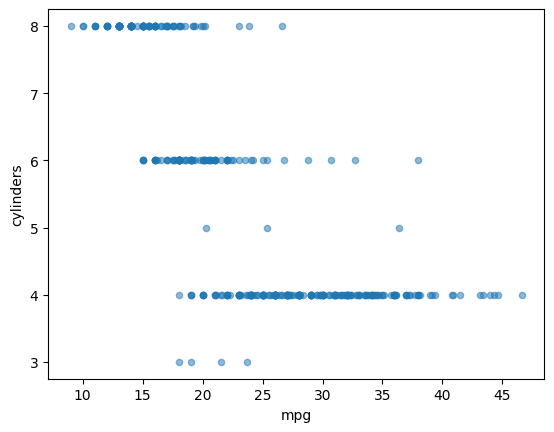

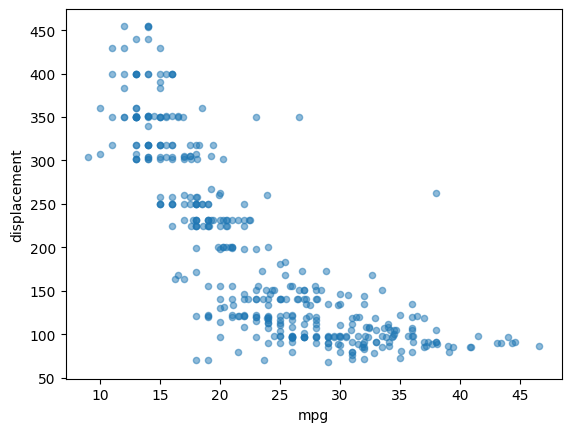

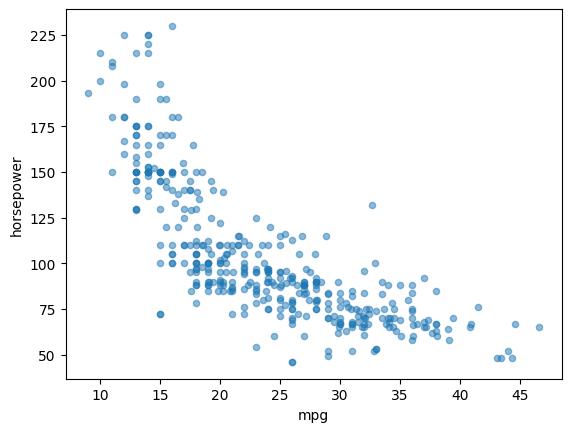

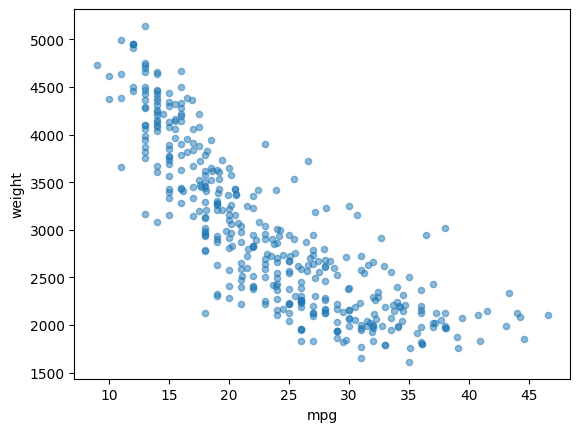

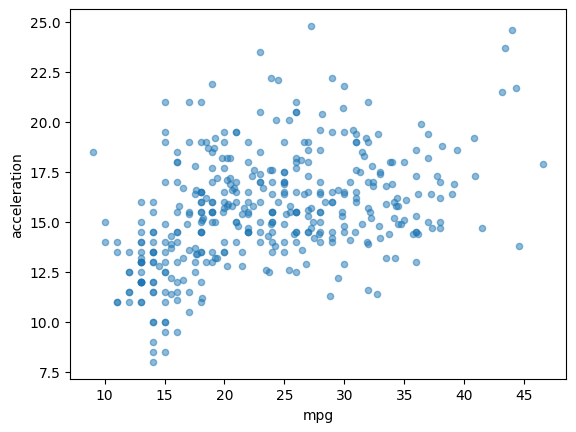

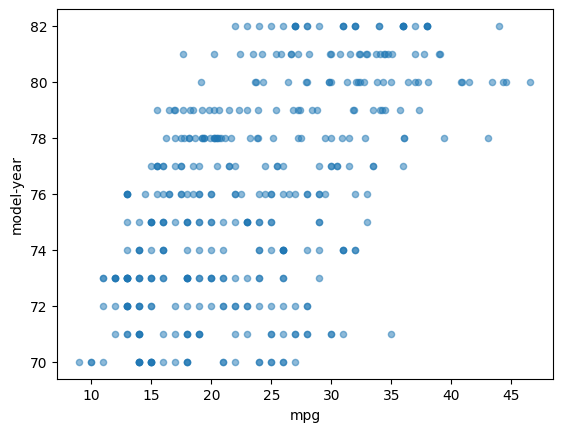

In [ ]:

## 예측하고자 하는 mpg와 다른 변수들간의 상관 관계를 분석해 보자.
## mapplotlib의 plot 메소드에 대해 kind, scatter 옵션을 이용하여 산점도를 그리자.

df.plot(kind='scatter', x='mpg', y='cylinders', alpha=0.5)
plt.show()

df.plot(kind='scatter', x='mpg', y='displacement', alpha=0.5)
plt.show()

df.plot(kind='scatter', x='mpg', y='horsepower', alpha=0.5)
plt.show()

df.plot(kind='scatter', x='mpg', y='weight', alpha=0.5)
plt.show()

df.plot(kind='scatter', x='mpg', y='acceleration', alpha=0.5)
plt.show()

df.plot(kind='scatter', x='mpg', y='model-year', alpha=0.5)
plt.show()

##df.plot(kind='scatter', x='mpg', y='origin', alpha=0.5)
##plt.show()



위와 같은 산점도 표를 보고, 정확히 상관 관계가 높은 독립 변수를 선택하자

예를 들어, horse_power 가 가장 강한 음의 상관 관계를 갖는다고 할 수 있다.  (두번째는 weigh )

In [ ]:
##20/398

4. 데이터 전처리

In [5]:
## 결측값이 잇는 행 전체를 제거 (axis 가 1이면 열을 제거, 0이면 행을 제거)

df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           396 non-null    float64
 1   cylinders     396 non-null    int64  
 2   displacement  396 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        396 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model-year    396 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.8 KB


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


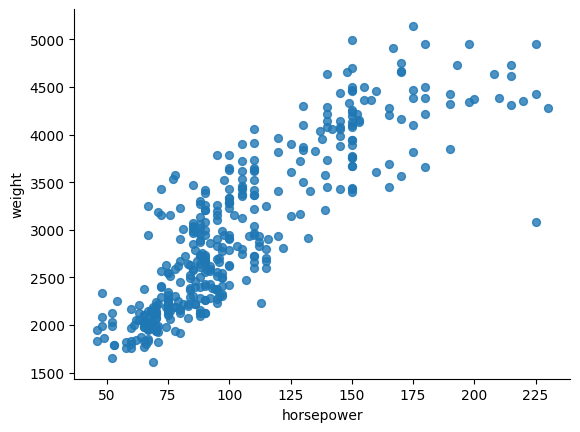

In [6]:
# @title horsepower vs weight

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='horsepower', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,23.517172,5.457071,193.650253,104.189394,2973.000000,15.555808,76.027778
std,7.834368,1.703511,104.422387,38.402030,847.690354,2.758295,3.696969
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.375000,4.000000,104.750000,75.000000,2225.250000,13.800000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,263.250000,125.000000,3610.000000,17.125000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


5. 분석 데이터 셋 분할

In [8]:

 X = df[["weight"]]
 y = df[["mpg"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 print(X_train.shape)
 print(X_test.shape)
 print(y_train.shape)
 print(y_test.shape)



(316, 1)
(80, 1)
(316, 1)
(80, 1)


6. 데이터 분석 수행

In [17]:
## Linear Regression 객체 생성  #### 객체 생성 // ### 객체 생성.

lr = LinearRegression()


## 학습 데이터를 이용하여 학습 수행
lr.fit(X_train, y_train)

LinearRegression()

In [18]:

### 회귀식의 기울기와 y 절편 출력.

print(" 기울기:",  lr.coef_)
print(" 절편: ", lr.intercept_)

 기울기: [[-0.00795094]]
 절편:  [47.30893759]


In [20]:
pred = lr.predict(X_test)

pred



array([[29.90433724],
       [30.33368782],
       [19.20237649],
       [31.76485642],
       [25.1258243 ],
       [16.77734081],
       [ 9.57379219],
       [33.35504375],
       [20.02132297],
       [32.46453884],
       [16.69783144],
       [15.06788943],
       [30.53246123],
       [26.70010976],
       [24.1717119 ],
       [30.41319718],
       [22.64513206],
       [26.43772885],
       [30.17466908],
       [29.10129263],
       [24.78393403],
       [30.3734425 ],
       [26.01632921],
       [19.44885553],
       [29.02178327],
       [29.30006605],
       [23.62309727],
       [19.96566641],
       [31.8046111 ],
       [27.34413563],
       [10.28142555],
       [18.52654687],
       [31.60583768],
       [21.62741217],
       [11.81595633],
       [16.30028461],
       [10.43249335],
       [30.40524625],
       [13.16761556],
       [10.61536489],
       [14.72599915],
       [21.46839344],
       [14.19328639],
       [21.82618559],
       [29.6578582 ],
       [ 9

In [21]:
pred.shape

(80, 1)

7. 성능 평가 및 시각화


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
#score = r2_score(y_test, pred)

score = mean_squared_error(y_test, pred)

print(score)

19.689235024466527


In [25]:
score = r2_score(y_test, pred)

#score = mean_squared_error(y_test, pred)

print(score)

0.6205049942063274


In [26]:
#score = r2_score(y_test, pred)

score = mean_absolute_error(y_test, pred)

print(score)

3.536159331622354


In [27]:
## 학습이 완료된 lr 객체에서 학습 데이터 셋으로 예측 수행해 보자... (부가적으로... )

from sklearn.metrics import mean_squared_error, r2_score

pred = lr.predict(X_train)

score = r2_score(y_train, pred)
print(score)


0.705422183951529


In [29]:
#score = r2_score(y_test, pred)

score = mean_squared_error(y_train, pred)

print(score)

18.623823844039855


In [31]:
#score = r2_score(y_test, pred)

score = mean_absolute_error(y_train, pred)

print(score)

3.274739102592845


In [ ]:
## 임의의 값을 넣을 수도 있다.

from sklearn.metrics import mean_squared_error, r2_score

pred = lr.predict([[5000]])

##score = r2_score(y_train, pred)
print(pred)

[[8.00225778]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


동일한 방법으로 horsepower와 mpg 와의 관계에서의 선형 회귀 분석을 수행해 보자. 기울기와 y절편, 결정계수를 확인해 보자

In [34]:
X = df[["horsepower"]]
y = df[["mpg"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(316, 1)
(80, 1)
(316, 1)
(80, 1)


In [38]:
## Linear Regression 객체 생성  #### 객체 생성 // ### 객체 생성.

lr2 = LinearRegression()


## 학습 데이터를 이용하여 학습 수행
lr2.fit(X_train, y_train)

LinearRegression()

In [51]:
### 회귀식의 기울기와 y 절편 출력.

print(" 기울기:",  lr2.coef_)
print(" 절편: ", lr2.intercept_)

 기울기: [[-0.1661516]]
 절편:  [41.0079078]


In [52]:
pred = lr2.predict(X_test)

pred

array([[29.54344715],
       [29.70959876],
       [23.56198943],
       [29.37729555],
       [26.71886989],
       [19.40819934],
       [12.7621352 ],
       [31.37111479],
       [29.04499234],
       [32.86647923],
       [ 9.43910313],
       [16.91592529],
       [30.20805357],
       [28.04808272],
       [19.07589613],
       [29.37729555],
       [25.22350546],
       [27.88193112],
       [28.54653753],
       [29.04499234],
       [25.22350546],
       [32.36802441],
       [26.05426348],
       [19.40819934],
       [28.04808272],
       [26.05426348],
       [26.55271829],
       [23.56198943],
       [33.36493404],
       [28.38038593],
       [16.41747047],
       [22.73123141],
       [30.20805357],
       [27.71577952],
       [16.08516727],
       [20.23895736],
       [17.7466833 ],
       [27.71577952],
       [17.7466833 ],
       [ 5.28531304],
       [19.40819934],
       [29.87575036],
       [12.7621352 ],
       [17.91283491],
       [27.54962791],
       [ 5

In [43]:
score = r2_score(y_test, pred)
print(score)

0.492925063582479


In [53]:
pred = lr2.predict(X_train)

score = r2_score(y_train, pred)
print(score)

0.6232601200520154


In [55]:
score = mean_squared_error(y_test, pred)

print(score)

ValueError: Found input variables with inconsistent numbers of samples: [80, 316]

In [47]:
score = mean_absolute_error(y_test, pred)

print(score)

3.9934272132844435


In [56]:
## 변수들 간의 상관 관계 분석
corr = df.corr(method = "pearson")  ## person 상관 계수. person, candal. etc...
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775680     -0.804711   -0.777575 -0.832725   
cylinders    -0.775680   1.000000      0.950706    0.843751  0.896058   
displacement -0.804711   0.950706      1.000000    0.897787  0.932729   
horsepower   -0.777575   0.843751      0.897787    1.000000  0.864350   
weight       -0.832725   0.896058      0.932729    0.864350  1.000000   
acceleration  0.421159  -0.504844     -0.542713   -0.687241 -0.415462   
model-year    0.581144  -0.352554     -0.374620   -0.420697 -0.311774   

              acceleration  model-year  
mpg               0.421159    0.581144  
cylinders        -0.504844   -0.352554  
displacement     -0.542713   -0.374620  
horsepower       -0.687241   -0.420697  
weight           -0.415462   -0.311774  
acceleration      1.000000    0.294588  
model-year        0.294588    1.000000  


Text(0.5, 1.0, 'mile per gallon')

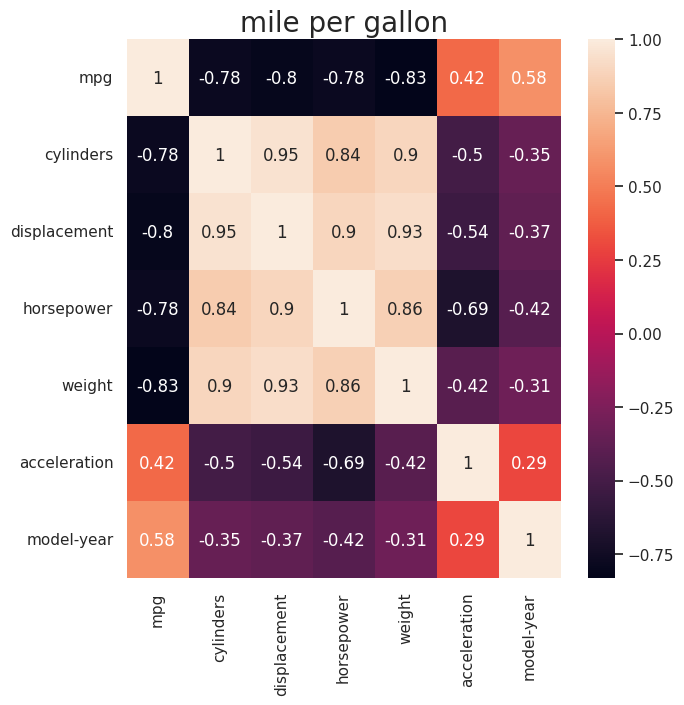

In [57]:
## 그림으로 그려보자.
import seaborn as sns

sns.set(style="white")

plt.subplots(figsize=(7,7))

sns.heatmap(corr, annot=True)
plt.title("mile per gallon", size=20)